<a href="https://colab.research.google.com/github/Trongnhat191/Yeast-Cell-Detection/blob/main/Yeast_Cell_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Yeast_Nhat

/content/drive/MyDrive/Yeast_Nhat


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image, ImageOps
import os
import numpy as np
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense , Dropout

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import warnings
from keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

warnings.filterwarnings("ignore")

In [ ]:
#padding màu đen vào ảnh
def resize_image(image):
    target_size = 1536
    height, width, _ = image.shape

    if height < target_size or width < target_size:

        pad_height = max(0, target_size - height)
        pad_width = max(0, target_size - width)

        padded_image = cv2.copyMakeBorder(image, 0, pad_height, 0, pad_width, cv2.BORDER_CONSTANT, value=[0, 0, 0])

        resized_image = padded_image[:target_size, :target_size, :]
    else:

        start_x = (width - target_size) // 2
        start_y = (height - target_size) // 2
        resized_image = image[start_y:start_y + target_size, start_x:start_x + target_size, :]

    return resized_image

#padding cùng màu với pixel đầu tiên của ảnh
def new_resize_image(image, value):
    target_size = 64
    height, width, _ = image.shape

    if height < target_size or width < target_size:

        pad_height = max(0, target_size - height)
        pad_width = max(0, target_size - width)

        resized_image = padded_image[:target_size, :target_size, :]
    else:

        start_x = (width - target_size) // 2
        start_y = (height - target_size) // 2
        resized_image = image[start_y:start_y + target_size, start_x:start_x + target_size, :]

    return resized_image

In [ ]:
# label_path = 'Classify_Labeled_Data'
# label_list = os.listdir(label_path)
# print(label_list)

# save_path = 'Fixed_Classify_Labeled_Data'
#-------------------------------------------------------
label_path = 'Classify_Labeled_Data'
label_list = os.listdir(label_path)
print(label_list)

save_path = 'New_Fixed_Classify_Labeled_Data'

['normal', 'abnormal', 'normal_2x', 'abnormal_2x']


In [ ]:
for i in label_list:
  print(f"{i} : {len(os.listdir(os.path.join(label_path,i)))}")
  # print(len(os.listdir(os.path.join(save_path,i,'train'))))
  # print(len(os.listdir(os.path.join(save_path,i,'val'))))
  # print(len(os.listdir(os.path.join(save_path,i,'test'))))


normal : 180
abnormal : 645
normal_2x : 19
abnormal_2x : 93


In [ ]:
for i in label_list[2:3]:
  print(i)
  image_name = sorted(os.listdir(os.path.join(label_path,i)))
  # print(image_name)
  for j in image_name:
    img = cv2.imread(os.path.join(label_path,i,j))
    img_new = new_resize_image(img, img[0][0].tolist())
    cv2_imshow(img_new)
    print(img_new.shape)
    if (img_new.shape != (64, 64, 3)):
      print('**********************************************')

    # cv2.imwrite(os.path.join(save_path,i,j),img_new)


In [ ]:
for test in label_list:
  print(test)

normal
abnormal
normal_2x
abnormal_2x


In [ ]:
for i in label_list:
  print(f"{i} : {len(os.listdir(os.path.join(save_path,i)))}")

normal : 3600
abnormal : 3225
normal_2x : 10107
abnormal_2x : 10415


### Làm giàu dữ liệu

In [ ]:
# test_path = 'test'
test = 'abnormal_2x'
# print(test)
image_name_list = sorted(os.listdir(os.path.join(save_path,test)))
print(image_name_list)

dem =0
for i in image_name_list[::3]:
      # print(i)
      # # ---------Flip------------
    #   img = cv2.imread(os.path.join(save_path,test,i))
    # #   cv2_imshow(img)

    #   new_img_1 = cv2.flip(img, 0)
    # #   cv2_imshow(new_img_1)
    #   dem += 1

    #   cv2.imwrite(os.path.join(save_path,test,i.split('.')[0])+'_flip_'+str(dem)+'.jpeg',new_img_1)

    #   new_img_2 = cv2.flip(img, 1)
    # #   cv2_imshow(new_img_2)
    #   dem += 1
    #   cv2.imwrite(os.path.join(save_path,test,i.split('.')[0])+'_flip_'+str(dem)+'.jpeg',new_img_2)

    #   new_img_3 = cv2.flip(img, -1)
    #   dem += 1
    # #   cv2_imshow(new_img_3)
    #   cv2.imwrite(os.path.join(save_path,test,i.split('.')[0])+'_flip_'+str(dem)+'.jpeg',new_img_3)
    #   print(dem)
      # --------------------------




      # ----------Bright----------
    #   img = cv2.imread(os.path.join(save_path,test,i))
    #   dem = 0
    #   img = img_to_array(img)
    #   data = expand_dims(img, 0)

    #   myImageGen = ImageDataGenerator(brightness_range=[0.7,1.05])

    #   # Batch_Size= 1 -> Moi lan sinh ra 1 anh
    #   gen = myImageGen.flow(data, batch_size=4)
    #   # Sinh ra 9 anh va hien thi len man hinh
    #   for _ in range(5):
    #       dem+=1
    #       # plt.subplot(330 + 1 + i)
    #       myBatch = gen.__next__()
    #       img_bright = myBatch[0].astype('uint8')
    #       cv2.imwrite(os.path.join(save_path,test,i.split('.')[0])+'_bright_'+str(dem)+'.jpeg',img_bright)
    #     #   cv2_imshow(img_rotate)
    #   print(dem)
      # # ----------------------------



      #---------Rotate-------------
# image_name_list = sorted(os.listdir(os.path.join(save_path,test)))
# print(image_name_list)

    dem +=1
    img = cv2.imread(os.path.join(save_path,test,i))
    img = img_to_array(img)
    data = expand_dims(img, 0)
    # Dinh nghia 1 doi tuong Data Generator voi bien phap chinh sua anh xoay toi da 80 do
    myImageGen = ImageDataGenerator(rotation_range=45)
    # Batch_Size= 1 -> Moi lan sinh ra 1 anh
    gen = myImageGen.flow(data, batch_size=1)
    # Sinh ra 9 anh va hien thi len man hinh
    for _ in range(1):

        # plt.subplot(330 + 1 + i)
        myBatch = gen.__next__()
        img_rotate = myBatch[0].astype('uint8')
        cv2.imwrite(os.path.join(save_path,test,i.split('.')[0])+'_rotate_'+str(dem)+'.jpeg',img_rotate)
        # cv2_imshow(img_rotate)
        # print(img_rotate.shape)
    print(dem)
    print("----------------------------------------------")




#Create train, validation, test dataset

In [ ]:
 lst = ['New_Train_Data_2', 'New_Val_Data_2', 'New_Test_Data_2']
 typ = ['normal_2x', 'abnormal_2x']
 for i in lst:
  for tmp1 in typ:
    tmp = os.listdir(i+'/'+tmp1)

    print(len(tmp))

7074
7290
1516
1562
1517
1563


In [ ]:
import os
import shutil

In [ ]:
train_data_path = 'Train_Data'
val_data_path = 'Val_Data'
test_data_path = 'Test_Data'
category_paths = ['normal_2x', 'abnormal_2x']
dem_val = 0
dem_test = 0
for category_path in category_paths:
    path = 'New_Fixed_Classify_Labeled_Data/'+ category_path
    # get image list
    image_list = os.listdir(path)

    train_list = image_list[:int(len(image_list)*0.7)]
    # val_list = image_list[int(len(image_list)*0.7):int(len(image_list)*0.85)]
    # test_list = image_list[int(len(image_list)*0.85):]

    for train_image in train_list:
        shutil.copy(os.path.join(path, train_image), 'New_'+train_data_path + '_2'+ '/' + category_path)
        dem_test+=1
        print(dem_test)

    # for val_image in val_list:
    #     shutil.copy(os.path.join(path, val_image), 'New_' + val_data_path+ '_2' + '/' + category_path)
    #     dem_val += 1
    #     print(dem_val)

    # for test_image in test_list:
    #     shutil.copy(os.path.join(path, test_image), 'New_'+ test_data_path + '_2'+ '/' + category_path)
    #     dem_test += 1
    #     print(dem_test)


#CNN Model


In [ ]:
train = ImageDataGenerator(rescale=1./255)
test = ImageDataGenerator(rescale=1./255)

In [ ]:
def pad_img(img, target_size):
    # Lấy kích thước hiện tại của ảnh
    h, w = img.shape[:2]

    # Tính toán số lượng padding cần thiết
    pad_h = max(0, (target_size[0] - h) // 2)
    pad_w = max(0, (target_size[1] - w) // 2)

    ex1 = (target_size[0] - h) % 2
    ex2 = (target_size[1] - w) % 2
    # Pad ảnh sao cho kích thước đạt target_size
    padded_img = cv2.copyMakeBorder(
        img,
        pad_h, pad_h + ex1, pad_w, pad_w +ex2,
        borderType=cv2.BORDER_CONSTANT,
        value=0  # Padding với màu đen (giá trị 0)
    )

    # Cắt ảnh nếu kích thước vượt quá target_size sau padding
    padded_img = padded_img[:target_size[0], :target_size[1]]

    return padded_img

#Normal and abnormal single yeast classification

In [ ]:
# Step 1: Load and preprocess the dataset
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'New_Train_Data',  # Path to training data
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    shuffle = True)

validation_generator = test_datagen.flow_from_directory(
    'New_Val_Data',  # Path to validation data
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    shuffle = True)

# Step 2: Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Step 3: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



NameError: name 'ImageDataGenerator' is not defined

In [ ]:
# callback_2 = ModelCheckpoint('new_copilot_model.keras',
#                              monitor='accuracy',
#                              save_best_only = True,
#                              save_weights_only = False,
#                              save_freq = 'epoch',
#                              mode='max',
#                              verbose =1
#                             )


#Normal and abnormal multi yeast classification

In [ ]:
# Step 1: Load and preprocess the dataset
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'New_Train_Data_2',  # Path to training data
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    shuffle = True)

validation_generator = test_datagen.flow_from_directory(
    'New_Test_Data_2',  # Path to validation data
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    shuffle = True)

# Step 2: Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), padding = 'same', activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), padding = 'same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3,3), padding = 'same',activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Step 3: Compile the model
optimizer = Adam(learning_rate=0.00001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])



FileNotFoundError: [Errno 2] No such file or directory: 'New_Train_Data_2'

In [ ]:
callback_2 = ModelCheckpoint('Multi_Yeast_Classification_time_2.keras',
                             monitor='accuracy',
                             save_best_only = True,
                             save_weights_only = False,
                             save_freq = 'epoch',
                             mode='max',
                             verbose =1
                            )

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,289,473 (16.36 MB)

 Trainable params: 4,289,025 (16.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model = tf.keras.models.load_model('4_classes_new_copilot_model_time_2.keras')

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,365,326 (28.10 MB)

 Trainable params: 2,455,108 (9.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,910,218 (18.73 MB)

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch = 50,  # Number of batches per epoch
    epochs=70,
    validation_data=validation_generator,
    validation_steps=50,
    callbacks = [callback_2])  # Number of batches for validation

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy}')

#4 Classes classification

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'New_Train_Data',  # Path to training data
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=True)

validation_generator = test_datagen.flow_from_directory(
    'New_Val_Data',  # Path to validation data
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=True)

# Step 2: Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),

    Dense(4, activation='softmax')
])

# Step 3: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callback_2 = ModelCheckpoint('4_classes_new_copilot_model_time_2.keras',
                             monitor='accuracy',
                             save_best_only=True,
                             save_weights_only=False,
                             save_freq='epoch',
                             mode='max',
                             verbose=1)

NameError: name 'train_datagen' is not defined

In [ ]:
model = tf.keras.models.load_model('4_classes_new_copilot_model_time_2.keras')
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy}')


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,453,569 (9.36 MB)

 Trainable params: 2,453,569 (9.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 4: Train the model
# model.fit(
    train_generator,
    steps_per_epoch=10,  # Number of batches per epoch
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50,
    callbacks = [callback_2])  # Number of batches for validation

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy}')

In [ ]:
# model = tf.keras.models.load_model('new_copilot_model.keras')
# model = tf.keras.models.load_model('4_classes_new_copilot_model_time_3.keras')
model = tf.keras.models.load_model('Multi_Yeast_Classification.keras')

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

labels  =['abnormal_2x','normal_2x']

# Load the trained model

# # Step 1: Load the image
# normal_list = os.listdir('New_Test_Data/normal')
# abnormal_list = os.listdir('New_Test_Data/abnormal')
normal_2x_list = os.listdir('New_Test_Data_2/normal_2x')
abnormal_2x_list = os.listdir('New_Test_Data_2/abnormal_2x')
dem =0
dem1 = 0
for i in abnormal_2x_list[1000:]:
    dem +=1
    img_path = 'New_Test_Data_2/abnormal_2x/'+i
    img = load_img(img_path, target_size=(64, 64))

    # Step 2: Preprocess the image
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Scale pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Step 3: Expand dimensions

    # Step 4: Predict the class
    predictions = model.predict(img_array)
    # predictions = model.predict(img_array)
    # print(predictions[0])

    # print(labels[predicted_class[0]])
    # Step 5: Interpret the result
    if predictions[0] > 0.5:
        dem1+=1
        print("normal_2x")
    else:
        print("abnormal_2x")
        # dem1+=1

print(dem1)
print(dem)



#Predict on image


In [ ]:
image_goc_path = 'Tu_Lieu_AI_Goc_Cut_Outside'
image_goc_list = os.listdir(image_goc_path)
image_goc_list = sorted(image_goc_list[:len(image_goc_list)])
print(image_goc_list)
print(len(image_goc_list))

['D1_B1_0H_02.jpeg', 'D1_B1_0H_12.jpeg', 'D1_B1_10H_11.jpeg', 'D1_B1_12H_02.jpeg', 'D1_B1_12H_04.jpeg', 'D1_B1_12H_11.jpeg', 'D1_B1_20H_01.jpeg', 'D1_B1_20H_06.jpeg', 'D1_B1_20H_08.jpeg', 'D1_B1_2H_01.jpeg', 'D1_B1_2H_04.jpeg', 'D1_B1_2H_06.jpeg', 'D1_B1_4H_03.jpeg', 'D1_B1_4H_05.jpeg', 'D1_B1_4H_08.jpeg', 'D1_B1_6H_02.jpeg', 'D1_B1_6H_11.jpeg', 'D1_B1_8H_06.jpeg', 'D1_B1_8H_08.jpeg', 'D1_B1_8H_12.jpeg', 'E1_B1_0H_02.jpeg', 'E1_B1_0H_05.jpeg', 'E1_B1_0H_11.jpeg', 'E1_B2_2H_02.jpeg', 'E1_B2_2H_09.jpeg', 'E1_B2_4H_02.jpeg', 'E1_B2_4H_04.jpeg', 'E1_B2_4H_09.jpeg', 'E1_B2_6H_03.jpeg', 'E1_B2_6H_06.jpeg', 'E1_B2_6H_10.jpeg', 'F1_B2_0H_08.jpeg', 'F1_B2_0H_11.jpeg', 'F1_B2_0H_12.jpeg', 'F1_B2_10H_03.jpeg', 'F1_B2_10H_06.jpeg', 'F1_B2_10H_08.jpeg', 'F1_B2_20H_07.jpeg', 'F1_B2_20H_09.jpeg', 'F1_B2_20H_12.jpeg', 'F1_B2_24H_03.jpeg', 'F1_B2_24H_04.jpeg', 'F1_B2_24H_05.jpeg', 'F1_B2_2H_02.jpeg', 'F1_B2_2H_09.jpeg', 'F1_B2_4H_02.jpeg', 'F1_B2_4H_06.jpeg', 'F1_B2_4H_12.jpeg', 'F1_B2_6H_01.jpeg', 'F1

In [ ]:
mask_path = 'mask'
mask_list = sorted(os.listdir(mask_path))
print(mask_list)
print(len(mask_list))

['D1_B1_0H_02.jpeg', 'D1_B1_0H_12.jpeg', 'D1_B1_10H_11.jpeg', 'D1_B1_12H_02.jpeg', 'D1_B1_12H_04.jpeg', 'D1_B1_12H_11.jpeg', 'D1_B1_20H_01.jpeg', 'D1_B1_20H_06.jpeg', 'D1_B1_20H_08.jpeg', 'D1_B1_2H_01.jpeg', 'D1_B1_2H_04.jpeg', 'D1_B1_2H_06.jpeg', 'D1_B1_4H_03.jpeg', 'D1_B1_4H_05.jpeg', 'D1_B1_4H_08.jpeg', 'D1_B1_6H_02.jpeg', 'D1_B1_6H_11.jpeg', 'D1_B1_8H_06.jpeg', 'D1_B1_8H_08.jpeg', 'D1_B1_8H_12.jpeg', 'E1_B1_0H_02.jpeg', 'E1_B1_0H_05.jpeg', 'E1_B1_0H_11.jpeg', 'E1_B2_2H_02.jpeg', 'E1_B2_2H_09.jpeg', 'E1_B2_4H_02.jpeg', 'E1_B2_4H_04.jpeg', 'E1_B2_4H_09.jpeg', 'E1_B2_6H_03.jpeg', 'E1_B2_6H_06.jpeg', 'E1_B2_6H_10.jpeg', 'F1_B2_0H_08.jpeg', 'F1_B2_0H_11.jpeg', 'F1_B2_0H_12.jpeg', 'F1_B2_10H_03.jpeg', 'F1_B2_10H_06.jpeg', 'F1_B2_10H_08.jpeg', 'F1_B2_20H_07.jpeg', 'F1_B2_20H_09.jpeg', 'F1_B2_20H_12.jpeg', 'F1_B2_24H_03.jpeg', 'F1_B2_24H_04.jpeg', 'F1_B2_24H_05.jpeg', 'F1_B2_2H_02.jpeg', 'F1_B2_2H_09.jpeg', 'F1_B2_4H_02.jpeg', 'F1_B2_4H_06.jpeg', 'F1_B2_4H_12.jpeg', 'F1_B2_6H_01.jpeg', 'F1

In [ ]:
t = os.listdir('Output')
print(len(t))

12


In [ ]:
def new_resize_image_1(image, value):
    """
    Resize the input image to 64x64x3. If the image is smaller, pad it. If it is larger, crop it.

    Parameters:
    image (array): The input image in BGR format.

    Returns:
    array: The resized image of size 64x64x3.
    """
    target_size = 64
    height, width, _ = image.shape

    if height < target_size or width < target_size:
        # Calculate padding
        pad_height = max(0, target_size - height)
        pad_width = max(0, target_size - width)
        # Pad the image
        padded_image = cv2.copyMakeBorder(image,
                                    pad_height // 2, pad_height - pad_height // 2,  # Top, Bottom
                                    pad_width // 2, pad_width - pad_width // 2,   # Left, Right
                                    cv2.BORDER_CONSTANT, value=value)
        # Crop to ensure the final size is exactly 64x64
        resized_image = padded_image[:target_size, :target_size, :]
    else:
        # Crop the image
        start_x = (width - target_size) // 2
        start_y = (height - target_size) // 2
        resized_image = image[start_y:start_y + target_size, start_x:start_x + target_size, :]

    return resized_image

In [ ]:
model1 = tf.keras.models.load_model('new_copilot_model.keras')#single yeast
# model2 = tf.keras.models.load_model('Multi_Yeast_Classification_time_2.keras')#multi yeast
model = tf.keras.models.load_model('4_classes_new_copilot_model_time_2.keras')#4 classes

In [ ]:
image_goc_path = 'Back_test_Cut_Outside/F1_B1_4H'
image_goc_list = os.listdir('Back_test_Cut_Outside/F1_B1_4H')
mask_path = 'Back_test_Cut_Outside/F1_B1_4H_Mask'
name = image_goc_list[1]
image_goc1 = cv2.imread(os.path.join(image_goc_path,name))
mask = cv2.imread(os.path.join(mask_path, name))
# cv2_imshow(image_goc1)
# cv2_imshow(mask)

def predict_on_image(image_goc1, mask, name):
    #GET LENGTH OF 1 PIXEL
    # circle_size = get_circle_size(image_goc1)
    # length_px = base_size/circle_size * base_ratio

    #PREDICT ON IMAGE

    gray_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray_mask, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for i, cnt in enumerate(contours):
      x, y, w, h = cv2.boundingRect(cnt)
      if h<10 or w<10 :
        continue

        #Chu vi va Dien tich
    #   area = round(cv2.contourArea(cnt)* length_px * length_px,3)
    #   perimeter = round(cv2.arcLength(cnt, True)*length_px,3)
    #   cv2.putText(image_goc1, f"A:{str(area)}", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 0), 1)
    #   cv2.putText(image_goc1, f"P:{str(perimeter)}", (x, y-22), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 0), 1)
        #predict
      cropped_image = image_goc1[y:y+h, x:x+w]
      h, w = cropped_image.shape[0], cropped_image.shape[1]
      diff = abs(cropped_image.shape[0] - cropped_image.shape[1])
      if cropped_image.size == 0:
        continue
      cropped_image = new_resize_image_1(cropped_image, cropped_image[0][0].tolist())
      img_array = img_to_array(cropped_image)
      img_array = img_array / 255.0  # Scale pixel values
      img_array = np.expand_dims(img_array, axis=0)

      predictions1 = model.predict(img_array)
    # #   predictions2 = model2.predict(img_array)

      predicted_class1 = np.argmax(predictions1, axis =1)
    # #   predicted_class2 = np.argmax(predictions2, axis =1)

      if predicted_class1[0] == 2:
        # print("normal")
        cv2.rectangle(image_goc1, (x-2, y-2), (x + w+4, y + h+4), (0, 0, 255), 2)

      elif predicted_class1[0] == 0:
        # print("abnormal")
        cv2.rectangle(image_goc1, (x-2, y-2), (x + w+4, y + h+4), (128, 0, 128), 2)
      elif predicted_class1[0] == 1:
        # print("abnormal_2x")
        cv2.rectangle(image_goc1, (x-2, y-2), (x + w+4, y + h+4), (255, 0, 0), 2)
      else:
        #normal_2x
        cv2.rectangle(image_goc1, (x-2, y-2), (x + w+4, y + h+4), (0, 255, 0), 2)
    # cv2.imwrite('Output/'+ name, image_goc1)
    cv2_imshow(image_goc1)

# cv2_imshow(predict_on_image(image_goc1, mask))
    #   if h>37 or w >37 or diff > 12:#da bao
    #     predictions1 = model2.predict(img_array)
    #     if (predictions1[0] > 0.5):
    #         cv2.rectangle(image_goc1, (x-2, y-2), (x + w+4, y + h+4),(0, 255, 0) , 2)
    #     else:
    #         cv2.rectangle(image_goc1, (x-2, y-2), (x + w+4, y + h+4), (255, 0, 0), 2)

    #   else : #don bao
    #     predictions1 = model1.predict(img_array)
    #     if (predictions1[0] > 0.5):
    #         cv2.rectangle(image_goc1, (x-2, y-2), (x + w+4, y + h+4), (0, 0, 255), 2)

    #     else:
    #         cv2.rectangle(image_goc1, (x-2, y-2), (x + w+4, y + h+4), (128, 0, 128), 2)





    #   if predicted_class2[0] == 2:
    #     # print("normal")
    #     cv2.rectangle(image_goc2, (x-2, y-2), (x + w+4, y + h+4), (0, 0, 255), 2)

    #   elif predicted_class2[0] == 0:
    #     # print("abnormal")
    #     cv2.rectangle(image_goc2, (x-2, y-2), (x + w+4, y + h+4), (128, 0, 128), 2)
    #   elif predicted_class2[0] == 1:
    #     # print("abnormal_2x")
    #     cv2.rectangle(image_goc2, (x-2, y-2), (x + w+4, y + h+4), (255, 0, 0), 2)
    #   else:
    #     #normal_2x
    #     cv2.rectangle(image_goc2, (x-2, y-2), (x + w+4, y + h+4), (0, 255, 0), 2)

    # cv2.imwrite('Back_test_Predict/2h/' + name, image_goc1)
    # cv2_imshow(image_goc2)

    # image_goc_rgb1 = cv2.cvtColor(image_goc1, cv2.COLOR_BGR2RGB)
    # image_goc_rgb2 = cv2.cvtColor(image_goc2, cv2.COLOR_BGR2RGB)
    # Create subplots
    # fig, axes = plt.subplots(1 , 2, figsize=(20, 20))  # Adjust figsize as needed

    # Display 'image_goc1'
    # axes[0].imshow(image_goc_rgb1)
    # axes[0].axis('off')
    # axes[0].set_title('Image Goc 1')

    # Display 'image_goc3'
    # axes[1].imshow(image_goc_rgb2)
    # axes[1].axis('off')
    # axes[1].set_title('Image Goc 2')


    # plt.tight_layout()
    # plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

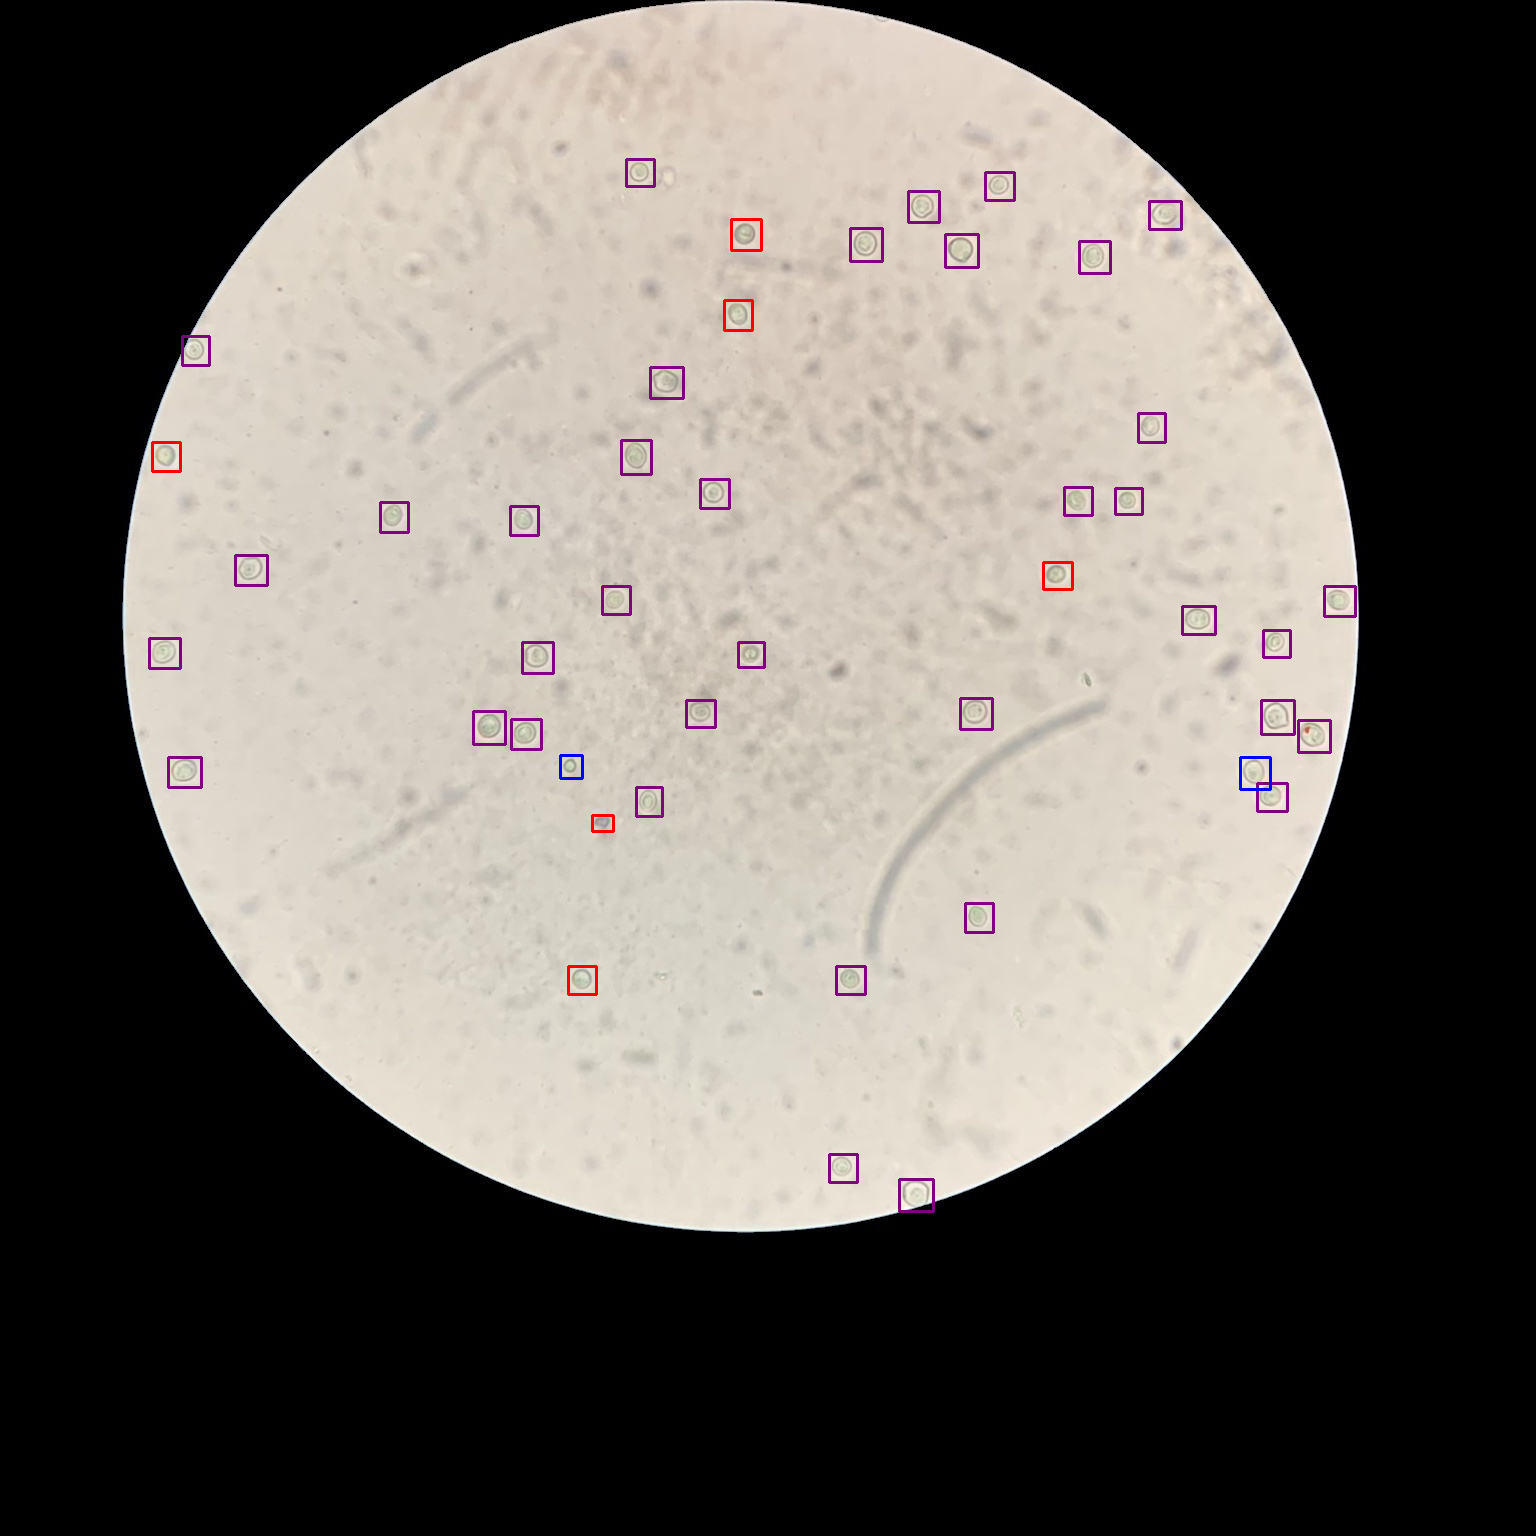

In [ ]:
for image_name in image_goc_list[:1]:
  image_goc = cv2.imread(os.path.join(image_goc_path,image_name))
  mask = cv2.imread(os.path.join(mask_path,image_name))
  predict_on_image(image_goc, mask, image_name)